# build initial positions for parcels deployments


In [1]:
import numpy as np
import pandas as pd
#import xarray as xr

import geopandas as gpd
from shapely.geometry import Polygon

%matplotlib inline
from matplotlib import pyplot as plt
from cartopy import crs as ccrs
import cartopy.feature as cfeature

import mitequinox.utils as ut

---
### load SWOT tracks

In [2]:
tracks = ut.load_swot_tracks()

In [3]:
def plot_site(bbox, figsize=(10,10)):

    central_lon = (bbox[0]+bbox[1])*0.5
    central_lat = (bbox[2]+bbox[3])*0.5

    polygon = Polygon([(bbox[0], bbox[2]), 
                       (bbox[1], bbox[2]), 
                       (bbox[1], bbox[3]), 
                       (bbox[0], bbox[3]), 
                       (bbox[0], bbox[2]),
                      ])
    #poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=world.crs)
    gdf = tracks["swath"]
    gdf_clipped = gpd.clip(gdf, polygon)

    #crs = ccrs.Orthographic(central_lon, central_lat)
    crs = ccrs.AlbersEqualArea(central_lon, central_lat)

    crs_proj4 = crs.proj4_init

    fig, ax = plt.subplots(1, 1, 
                           subplot_kw={'projection': crs},
                           figsize=figsize,
                          )
    ax.set_extent(bbox)

    #_gdf = gdf.cx[bbox[0]:bbox[1], bbox[2]:bbox[3]]
    _gdf = gdf_clipped
    gdf_crs = _gdf.to_crs(crs_proj4)
    ax.add_geometries(gdf_crs['geometry'],
                      crs=crs,
                      facecolor='grey', 
                      edgecolor='black',
                      alpha=0.5,
                     )

    ax.gridlines(draw_labels=True)
    ax.coastlines(resolution='50m')

    return fig, ax

### Californian site

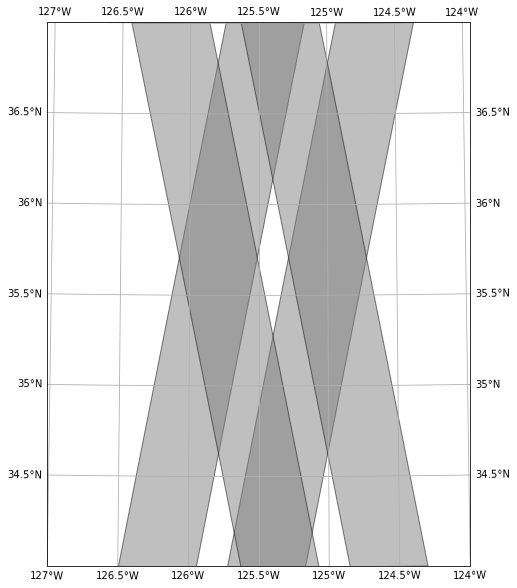

In [4]:
bbox = [-127, -124, 34, 37] # small bbox
plot_site(bbox);

--- 

### build tool to compute initial positions

In [5]:
# utils

# compute mid point
mid = lambda a, b: dict(lon = (a["lon"]+b["lon"])*.5,
                        lat = (a["lat"]+b["lat"])*.5,
                       )

def follow_path(lon, lat, dl):
    """ Build a trajectory with dl (nautical miles) along the lon, lat paths
    """

    r = np.cos(np.pi/180.*np.mean(lat))

    for i in range(len(lon)-1):
        dlon = lon[i+1]-lon[i]
        dlat = lat[i+1]-lat[i]
        dl_segment = np.sqrt(dlon**2 * r**2 + dlat**2) # in deg
        ds = dl/60/dl_segment
        if i==0:
            lon_i, lat_i = [lon[0] - dlon * ds/2], [lat[0] - dlat * ds/2]
        s = 0
        while s<1:
            _lon = lon_i[-1] + dlon * ds
            _lat = lat_i[-1] + dlat * ds
            lon_i.append( _lon )
            lat_i.append( _lat )
            s += ds
            #flag = ( (_lon-lon[i]) * (_lon-lon[i+1]) < 0 ) | ( (_lat-lat[i]) * (_lat-lat[i+1]) < 0 )
    return lon_i, lat_i

# corners of the eastern cross-over diamond
south = dict(lon=-125, lat=34.61)
north = dict(lon=-125, lat=36.8)
west = dict(lon=-125.3, lat=35.7)
east = dict(lon=-124.7, lat=35.7)

--- 
### cross within diamond

In [6]:
lon, lat = [], []

lon.append(mid(west, north)["lon"])
lat.append(mid(west, north)["lat"])

lon.append(mid(east, south)["lon"])
lat.append(mid(east, south)["lat"])

lon.append(mid(west, south)["lon"])
lat.append(mid(west, south)["lat"])

lon.append(mid(east, north)["lon"])
lat.append(mid(east, north)["lat"])

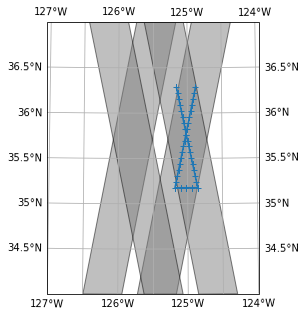

In [7]:
dl = 4 # in nautical miles
lon_i, lat_i = follow_path(lon, lat, dl)

fig, ax = plot_site(bbox, figsize=(5,5))
ax.plot(lon_i, lat_i, '-+', transform=ccrs.PlateCarree())

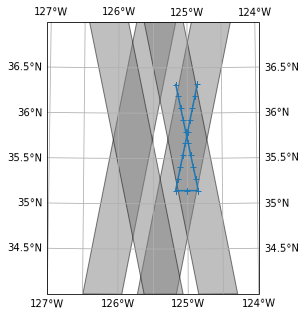

In [8]:

dl = 8 # in nautical miles
lon_i, lat_i = follow_path(lon, lat, dl)

fig, ax = plot_site(bbox, figsize=(5,5))
ax.plot(lon_i, lat_i, '-+', transform=ccrs.PlateCarree())

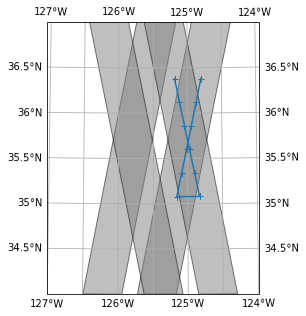

In [9]:
dl = 16 # in nautical miles
lon_i, lat_i = follow_path(lon, lat, dl)

fig, ax = plot_site(bbox, figsize=(5,5))
ax.plot(lon_i, lat_i, '-+', transform=ccrs.PlateCarree())